In [ ]:
%matplotlib inline
!pip install fastf1
!pip install timple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
from timple.timedelta import strftimedelta
import fastf1
import fastf1.plotting
from fastf1.core import Laps
import pandas as pd

In [ ]:
fastf1.Cache.enable_cache('/content/sample_data')  # replace with your cache directory


In [ ]:
session_fp3 = fastf1.get_session(2022,1,'FP3')
session_fp3.load()

In [ ]:
session_q = fastf1.get_session(2022,1,'Q')
session_q.load()

In [ ]:
driver = 'VER'
fp3_lap = session_fp3.laps.pick_driver(driver).pick_fastest()
q_lap = session_q.laps.pick_driver(driver).pick_fastest()

In [ ]:
fp3_tel = fp3_lap.get_car_data().add_distance()
q_tel = q_lap.get_car_data().add_distance()
print (q_tel)

                       Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2022-03-19 15:58:45.931  10693    294      7       100  False   12    car   
1   2022-03-19 15:58:46.131  10474    295      8       100  False   12    car   
2   2022-03-19 15:58:46.291  10630    296      8       100  False   12    car   
3   2022-03-19 15:58:46.491  10727    298      8       100  False   12    car   
4   2022-03-19 15:58:46.731  10761    301      8       100  False   12    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
331 2022-03-19 16:00:15.171  10946    276      7       100  False   12    car   
332 2022-03-19 16:00:15.411  11187    278      7       100  False   12    car   
333 2022-03-19 16:00:15.651  11253    283      7       100  False   12    car   
334 2022-03-19 16:00:16.051  11460    286      7       100  False   12    car   
335 2022-03-19 16:00:16.411  11508    290      7       100  False   12    car   

                      Time 

In [ ]:
print(fp3_tel)

                       Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2022-03-19 12:46:48.550  11529    291      7       100  False   12    car   
1   2022-03-19 12:46:48.791  11597    293      7       100  False   12    car   
2   2022-03-19 12:46:49.111  10492    295      7       100  False   12    car   
3   2022-03-19 12:46:49.271  10529    296      8       100  False   12    car   
4   2022-03-19 12:46:49.551  10701    298      8       100  False   12    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
340 2022-03-19 12:48:19.511  10941    270      7       100  False   12    car   
341 2022-03-19 12:48:19.751  11052    276      7       100  False   12    car   
342 2022-03-19 12:48:20.151  11197    281      7       100  False   12    car   
343 2022-03-19 12:48:20.431  11329    284      7       100  False   12    car   
344 2022-03-19 12:48:20.670  11295    287      7       100  False   12    car   

                      Time 

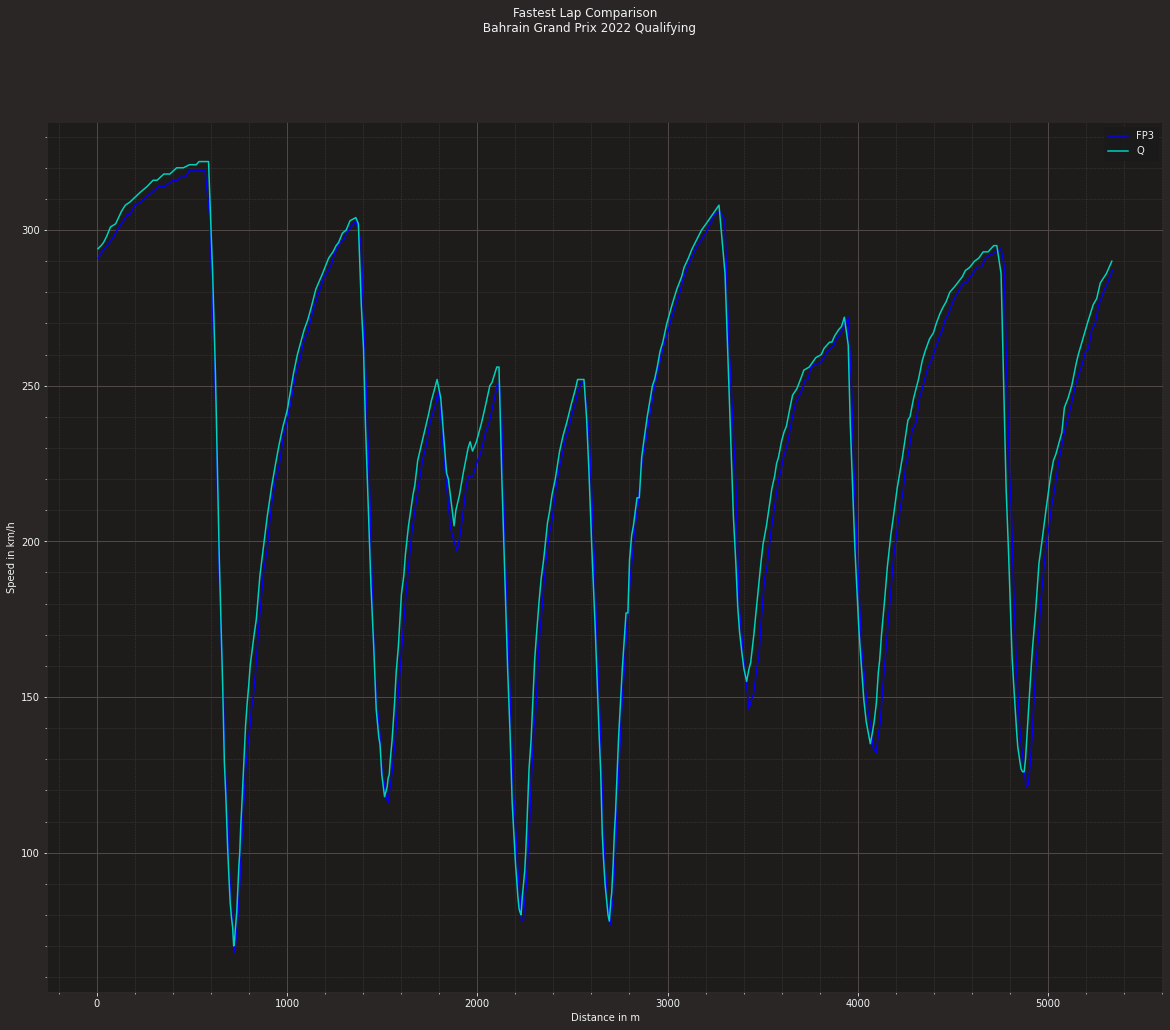

In [ ]:
fastf1.plotting.setup_mpl()


rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots(figsize=(20, 16))
ax.plot(fp3_tel['Distance'], fp3_tel['Speed'], color=rbr_color, label='FP3')
ax.plot(q_tel['Distance'], q_tel['Speed'], color=mer_color, label='Q')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session_fp3.event['EventName']} {session_fp3.event.year} Qualifying")

plt.show()

In [ ]:
fig.savefig('fastest_lap_telemetry.png', dpi=300)